### Question 1

In [9]:
import pandas as pd
import math
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(url, sep='|')

meanAge = users.groupby('occupation')['age'].mean()
print("Step 4: Discover what is the mean age per occupation:")
print(meanAge)

# creating a new column for male
users['male'] = (users['gender'] == 'M').astype(int)

maleRatio = users.groupby('occupation')['male'].mean()
maleRatio.sort_values(ascending=False, inplace=True)
print("\nStep 5: Discover the male ratio per occupation:")
print(maleRatio)

minMaxAge = users.groupby('occupation')['age'].agg(['min', 'max'])
print("\nStep 6: For each occupation, calculate the minimum and maximum ages:")
print(minMaxAge)

meanAge_O_S = users.groupby(['occupation', 'gender'])['age'].mean()
print("\nStep 7: For each combination of occupation and sec, calculate the mean age:")
print(meanAge_O_S)

genderCount = users.groupby(['occupation', 'gender'])['gender'].count()
occupationCount = users.groupby('occupation')['gender'].count()
genderPercentage = (genderCount / occupationCount) * 100
print("\nStep 8: For each occupation preseent the percentage of women and men:")
print(genderPercentage)

Step 4: Discover what is the mean age per occupation:
occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64

Step 5: Discover the male ratio per occupation:
occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726

### Question 2

In [19]:
import pandas as pd
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
euro12 = pd.read_csv(url , sep=',')
goals = euro12['Goals']
print("Goals Column:")
print(goals)

numTeams = len(euro12['Team'].unique())
print("Number of teams in Euro 2012: ", numTeams)

numCols = len(euro12.columns)
print("Number of columns in Euro 2012: ", numCols)

discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
discipline_sorted = discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending=[False, False])
meanYellowCards = discipline['Yellow Cards'].mean()
print("Mean Yellow Cards per Team: ", meanYellowCards)

highScorers = euro12[euro12['Goals'] > 6]['Team']
print("Teams that scored more than 6 goals: \n", highScorers)

teamsStartWith_G = euro12[euro12['Team'].str.startswith('G')]['Team']
print("Teams that start with G: \n", teamsStartWith_G)

first7Cols = euro12.iloc[:, :7]
print("First 7 columns:")
print(first7Cols)

allColsExceptLast3 = euro12.iloc[:, :-3]
print("All columns except last 3")
print(allColsExceptLast3)

shootingAccuracy = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]
print("Shooting Accuracy from England, Italy and Russia: \n", shootingAccuracy)


Goals Column:
0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64
Number of teams in Euro 2012:  16
Number of columns in Euro 2012:  35
Mean Yellow Cards per Team:  7.4375
Teams that scored more than 6 goals: 
 5     Germany
13      Spain
Name: Team, dtype: object
Teams that start with G: 
 5    Germany
6     Greece
Name: Team, dtype: object
First 7 columns:
                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5        

### Question 3

In [28]:
import pandas as pd
import numpy as np

series_1 = pd.Series(np.random.randint(1, 4, size=100))
series_2 = pd.Series(np.random.randint(1, 3, size=100))
series_3 = pd.Series(np.random.randint(10000, 30000, size=100))

df = pd.concat([series_1, series_2, series_3], axis=1)
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']

bigcolumn = pd.concat([df.bedrs, df.bathrs, df.price_sqr_meter], axis=0, ignore_index=True)
bigcolumn = pd.DataFrame(bigcolumn)

print(bigcolumn.index.max())
#No, the output is going till 299.

bigcolumn = bigcolumn.reset_index(drop=True)


299


### Question 5

In [73]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'
data = pd.read_csv(url, delimiter='\t')

print("Step 4: \n")
print(data.head(10))
print("Step 5: \n" + str(len(data)))
print("Step 6: \n" + str(len(data.columns)))
print("Step 7: \n" + str(data.columns))
print("Step 8: " + str(0))
itemNameSum = data.groupby('item_name').sum()
itemNameSum = itemNameSum.sort_values('quantity', ascending=False)
print("Step 9 & 10: \n" + str(itemNameSum.head(1)))
choiceSum = data.groupby('choice_description').sum()
choiceSum = choiceSum.sort_values('quantity', ascending=False)
print("Step 11: \n" + str(choiceSum.head(1)))
print("Step 12: \n" + str(sum(data['quantity'])))
print(data['item_price'].dtype)
data['item_price'] = data['item_price'].apply(lambda x: float(x[1:]))

#after the conversion
print(data['item_price'].dtype)
revenue = data['quantity'] * data['item_price']
revenue = revenue.sum()
print("Step 14: \n" + str(revenue))
print("Step 15: \n" + str(data['order_id'].nunique()))
print("Step 16: \n" +str(revenue/data['order_id'].nunique()))
print("Step 17: \n" +str(data['item_name'].nunique()))

Step 4: 

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                    

### Question 6

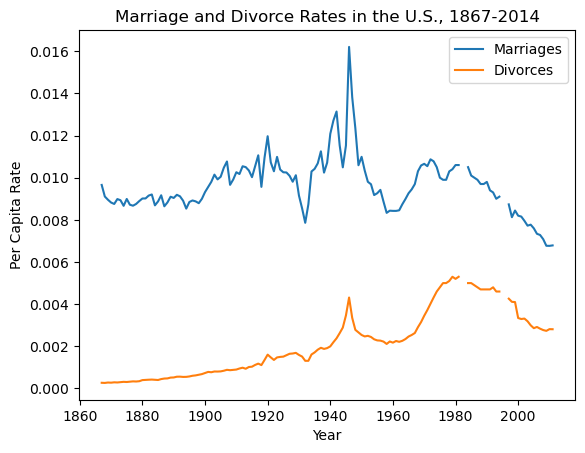

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('us-marriages-divorces-1867-2014.csv')

# per capita rates
data['Marriage_Rate'] = data['Marriages'] / data['Population']
data['Divorce_Rate'] = data['Divorces'] / data['Population']

# Plotting the graph
plt.plot(data['Year'], data['Marriage_Rate'], label='Marriages')
plt.plot(data['Year'], data['Divorce_Rate'], label='Divorces')

# labels and legend
plt.xlabel('Year')
plt.ylabel('Per Capita Rate')
plt.title('Marriage and Divorce Rates in the U.S., 1867-2014')
plt.legend()

# Show the plot
plt.show()


### Question 7

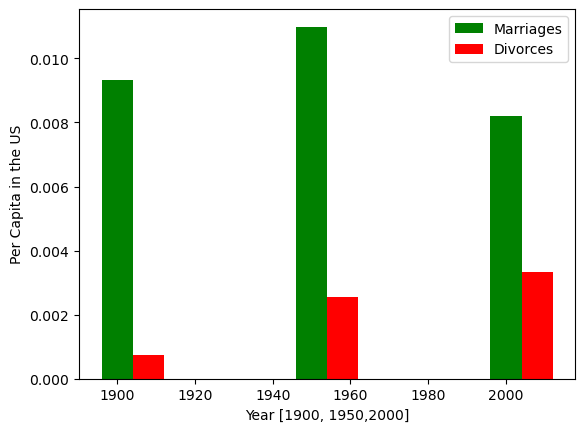

In [49]:
data = pd.read_csv('us-marriages-divorces-1867-2014.csv')
data = data[data.Year.isin([1900, 1950, 2000])]
data['Marriages_per_capita'] = data.Marriages / data.Population
data['Divorces_per_capita'] = data.Divorces / data.Population

bar_width = 8
opacity = 1
marriages = plt.bar(data.Year, data.Marriages_per_capita, bar_width,
                    alpha=opacity, color='g', label='Marriages')
divorces = plt.bar(data.Year + bar_width, data.Divorces_per_capita, bar_width,
                   alpha=opacity, color='r', label='Divorces')


plt.xlabel('Year [1900, 1950,2000]')
plt.ylabel('Per Capita in the US')
plt.legend()

plt.show()


### Question 8

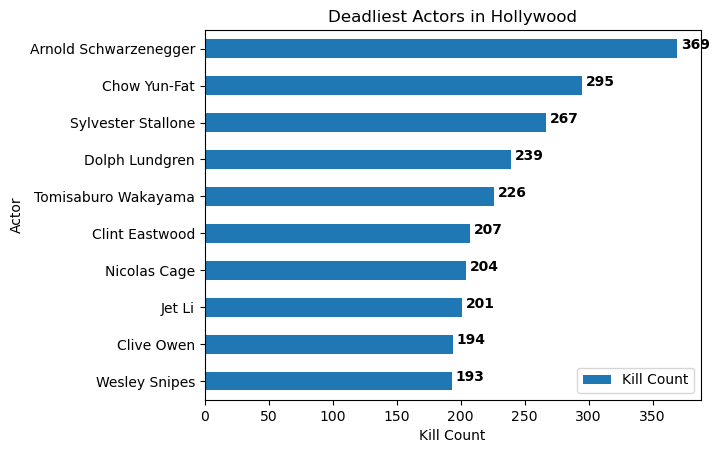

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('actor_kill_counts.csv')
data['Actor'] = data['Actor']
data['Kill Count'] = data['Count']
df = pd.DataFrame(data)

df = df.sort_values(by='Kill Count', ascending=True)

# horizontal bar chart
ax = df.plot(kind='barh', x='Actor', y='Kill Count')

ax.set_title('Deadliest Actors in Hollywood')
ax.set_xlabel('Kill Count')
ax.set_ylabel('Actor')

# Labeling each bar with the respective actor's name
for i, v in enumerate(df['Kill Count']):
    ax.text(v + 3, i, str(v), color='black', fontweight='bold')

plt.show()


### Question 9

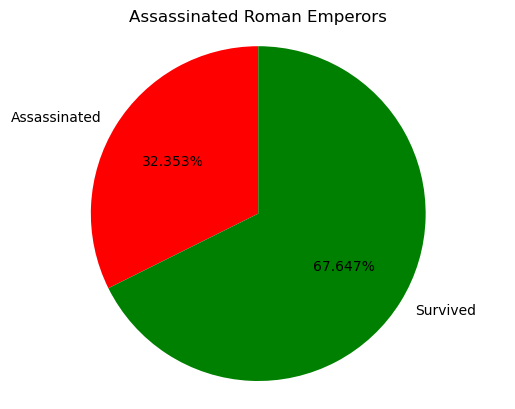

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('roman-emperor-reigns.csv')
totalEmperors = len(data)
assassinated = len(data[data['Cause_of_Death'] == 'Assassinated'])
assassinatedPerc = (assassinated / totalEmperors) * 100
survivedPerc = 100 - assassinatedPerc

labels = ['Assassinated', 'Survived']
sizes = [assassinatedPerc, survivedPerc]
colors = ['red', 'green']

plt.pie(sizes, labels=labels, colors=colors, autopct='%3.3f%%', startangle=90)
plt.title('Assassinated Roman Emperors')
plt.axis('equal')


plt.show()

### Question 10

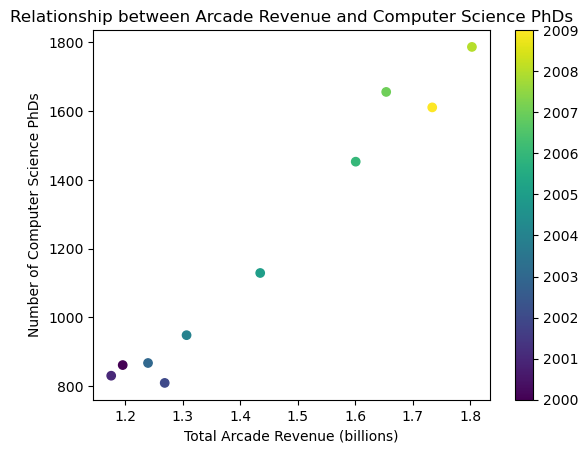

In [72]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')


plt.scatter(data['Total Arcade Revenue (billions)'], data['Computer Science Doctorates Awarded (US)'], c=data['Year'])
plt.xlabel('Total Arcade Revenue (billions)')
plt.ylabel('Number of Computer Science PhDs')
plt.title('Relationship between Arcade Revenue and Computer Science PhDs')

cbar = plt.colorbar()
plt.show()